# Atividade Bônus 1

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [187]:
# GERA REDE E RESOLUÇÃO

def GeraRede(nx,ny,CH,CV):
    nv = nx*ny
    nc = (nx-1)*ny + (ny-1)*nx
    
    coord = np.zeros(shape=(nv,2))

    for i in range(nx):
      for j in range(ny):
        ig = i + j*nx
        coord[ig,0] = i
        coord[ig,1] = j

    conec = np.zeros(shape=(nc,2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(ny):
        for i in range(nx-1):
          k = j*(nx-1) + i
          conec[k,0] = j*nx + i
          conec[k,1] = j*nx + i+1
          C[k] = CH

    # Loop sobre canos verticais
    for i in range(nx):
      for j in range(ny-1):
          k = (nx-1)*ny + j*nx + i
          conec[k,0] = i + j*nx
          conec[k,1] = i + (j+1)*nx
          C[k] = CV

    return nv, nc, conec, C, coord

def Assembly(conec, C, nv, nc):
    A = np.zeros(shape=(nv,nv))
    for k in range(nc):
        n1 = conec[k,0]
        n2 = conec[k,1]

        A[n1,n2] += -C[k]
        A[n2,n1] += -C[k]
        A[n1,n1] += C[k] 
        A[n2,n2] += C[k]
    
    return A

def SolveNetwork(conec, C, natm, nB, QB, nv, nc):
    Atilde = Assembly(conec, C, nv, nc)
    Atilde[natm, :] = 0
    Atilde[natm, natm] = 1
    
    b = np.zeros((len(Atilde),1))
    b[nB] = QB
    pressure = np.linalg.solve(Atilde, b)
    return pressure

In [188]:
def GetDK(conec, C, nv, nc):
    K = np.zeros(shape=(nc,nc))
    D = np.zeros(shape=(nc,nv))
    
    for i in range(nc):                 # Coloca valor em todas as diagonais
        K[i,i] = C[i]

    for k in range(nc):                 # Ajuste dos indexes
        n1 = conec[k,0]
        n2 = conec[k,1]
        D[k,n1] = 1
        D[k,n2] = -1 

    return K, D

def CalculaPotencia(conec, P, C, nv, nc):

    K, D = GetDK(conec, C, nv, nc)
    return (np.transpose(P) @ (np.transpose(D) @ K @ D) @ P)

In [189]:
# GERA CH E CV

def GeraChCv_1(x):
    CH = 2.3 + (0.1*(x-1)**2)
    CV = 1.8 + (0.2*(x-1)**2)
    return CH, CV

def GeraChCv_2(x):
    CH = 2.3 + 10*(math.exp(-(x-5)**2))
    CV = 1.8 + 10*(math.exp(-(x-5)**2))
    return CH, CV
    

In [190]:

# VALORES DO EXEMPLO

i = 0
n, m = 8, 9
qB = 3
natm = n*m -1
nB = 0



In [203]:
def GeraPotencias(n, m, qb, natm, nb, equation, initial_x, end_x):
    i = 0
    x = initial_x
    cH_values = []
    cV_values = []
    x_values = []
    potencias = []

    while x < end_x:
        x += 0.05
        match equation:
            case 1:
                CH, CV = GeraChCv_1(x)
            case 2:
                CH, CV = GeraChCv_2(x)
            case _:
                CH, CV = GeraChCv_1(x)
            
        x_values.append(x)
        cH_values.append(CH)
        cV_values.append(CV)

    for ch in cH_values:
        nv, nc, conec, C, coord = GeraRede(n, m, ch, cV_values[i])
        P = SolveNetwork(conec, C, natm, nB, qB, nv, nc)
        W = CalculaPotencia(conec, P, C, nv, nc)
        potencias.append(np.max(W))
        i += 1

    return x_values, potencias

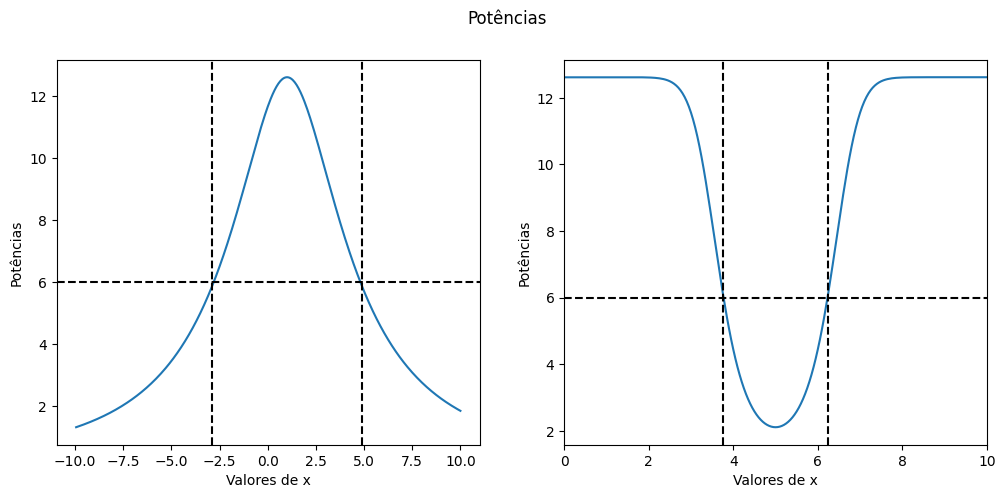

In [208]:
x_values1, potencias1 = GeraPotencias(n, m, qB, natm, nB, 1, -10, 10)
x_values2, potencias2 = GeraPotencias(n, m, qB, natm, nB, 2, -10, 10)

# PLOTANDO GŔAFICOS POTENCIAS x X

fig, axs = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Potências')
axs[0].plot(x_values1, potencias1)
axs[0].set_xlabel('Valores de x')
axs[0].set_ylabel('Potências')

axs[0].axhline(6, linestyle='--', color='k') # horizontal lines
axs[0].axvline(-2.9, linestyle='--', color='k') # vertical lines
axs[0].axvline(4.9, linestyle='--', color='k') # vertical lines


axs[1].plot(x_values2, potencias2)
axs[1].set_xlabel('Valores de x')
axs[1].set_ylabel('Potências')
axs[1].set_xlim([0,10])

axs[1].axhline(6, linestyle='--', color='k') # horizontal lines
axs[1].axvline(3.76, linestyle='--', color='k') # vertical lines
axs[1].axvline(6.24, linestyle='--', color='k') # vertical lines